## 1. Import Library

In [1]:
import tensorflow as tf
import pandas as pd
import datetime
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from tensorflow.keras import optimizers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, roc_auc_score, auc, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

## 2. Preprocessing Data

In [2]:
train_path='Dataset/train/'
test_path='Dataset/test/'
num_classes=3

In [3]:
train_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(train_path, target_size=(244,244), 
                                                                     color_mode='rgb', batch_size=30, shuffle=True)

Found 390 images belonging to 3 classes.


## 3. Create The Model

In [4]:
model=Xception(weights='imagenet', include_top=True)
model.layers.pop()
new_layer=Dense(num_classes, activation='softmax', name='prediction_1')
model=Model(model.input, new_layer(model.layers[-1].output))



91884032/91884032 [==============================] - 28s 0us/step


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'] 

## 4. Training The Model

In [6]:
sgd=tf.keras.optimizers.legacy.SGD(lr=0.0001, decay=0.0001)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\LENOVO\Desktop\Portfolio_AI\P1_MulticlassClassification_CovidPneumonia_ResNet50\venv\Lib\site-packages\keras\src\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97):
            self.model.stop_training=True

stopTraining=Callback()

In [8]:
history=model.fit_generator(train_batches, epochs=10, verbose=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9384\2803618879.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_batches, epochs=10, verbose=1)


Epoch 1/10


13/13 [==============================] - 222s 14s/step - loss: 1.0994 - accuracy: 0.2949
Epoch 2/10
13/13 [==============================] - 189s 14s/step - loss: 1.0995 - accuracy: 0.2974
Epoch 3/10
13/13 [==============================] - 184s 14s/step - loss: 1.0995 - accuracy: 0.2949
Epoch 4/10
13/13 [==============================] - 174s 13s/step - loss: 1.0994 - accuracy: 0.2769
Epoch 5/10
13/13 [==============================] - 175s 13s/step - loss: 1.0996 - accuracy: 0.2692
Epoch 6/10
13/13 [==============================] - 178s 14s/step - loss: 1.0996 - accuracy: 0.2615
Epoch 7/10
13/13 [==============================] - 176s 14s/step - loss: 1.0993 - accuracy: 0.2769
Epoch 8/10
13/13 [==============================] - 174s 13s/step - loss: 1.0993 - accuracy: 0.2615
Epoch 9/10
13/13 [==============================] - 176s 14s/step - loss: 1.0995 - accuracy: 0.2615
Epoch 10/10
13/13 [==============================] - 179s 14s/step - loss: 1.0995 - accuracy: 0.27

## 5. Prediksi Data Uji

In [9]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_path, batch_size=64, shuffle=False, target_size=(224,224))
predicts_vectors=model.predict_generator(test_generator, verbose=1)

Found 150 images belonging to 3 classes.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9384\3610195978.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicts_vectors=model.predict_generator(test_generator, verbose=1)


3/3 [==============================] - 21s 4s/step


In [10]:
pred=np.argmax(predicts_vectors, axis=1)

## 6. Validasi Hasil Prediksi Data Uji

In [11]:

lb=LabelBinarizer()
lb.fit(test_generator.labels)

y_test=lb.transform(test_generator.labels)
y_pred=lb.transform(pred)

auc_score=roc_auc_score(y_test, y_pred, average="macro")

In [12]:
y_true=test_generator.labels
y_pred=pred

recall=recall_score(y_true, y_pred, average='macro')
precision=precision_score(y_true, y_pred, average='macro')
f1=f1_score(y_true, y_pred, average='macro')
kappa=cohen_kappa_score(test_generator.labels, pred)
acc=accuracy_score(test_generator.labels, pred)

In [13]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
print(y_pred)

[0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 2 1 1 1 1 1 0 0 2 1 1 1 1 1 1 1 2 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0
 0 2 2 2 1 0 1 1 1 1 0 0 1 0 1 2 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 0
 1 2]


## Evaluation

In [15]:
print('>>>> RESULT <<<<')
print('Accuracy: {}'.format(acc*100))
print('Recall: {}'.format(recall*100))
print('Precision: {}'.format(precision*100))
print('F1-Score: {}'.format(f1))
print('AUC: {}'.format(auc_score))
print('Kappa: {}'.format(kappa))

>>>> RESULT <<<<
Accuracy: 40.0
Recall: 40.0
Precision: 49.56077630234934
F1-Score: 0.37424224554782404
AUC: 0.5499999999999999
Kappa: 0.09999999999999998


In [16]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40        50
           1       0.36      0.64      0.46        50
           2       0.73      0.16      0.26        50

    accuracy                           0.40       150
   macro avg       0.50      0.40      0.37       150
weighted avg       0.50      0.40      0.37       150



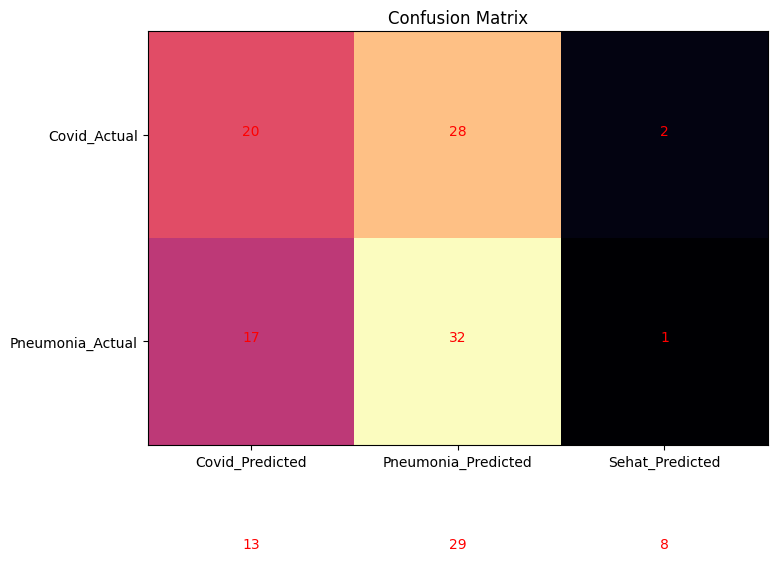

Accuracy: 0.4000
Sensitivity: 0.4000
Specificity: 0.6400


In [17]:
cm=confusion_matrix(y_test.argmax(axis=1), y_pred)
total=sum(sum(cm))
acc = (cm[0,0] + cm[1,1] + cm[2,2]) / total
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1] + cm[0,2])
specificity = cm[1,1] / (cm[1,0] + cm[1,1] + cm[1,2])

# Plot Confusion Matrix
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='magma')
ax.set_title("Confusion Matrix")
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Covid_Predicted', 'Pneumonia_Predicted', 'Sehat_Predicted'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Covid_Actual', 'Pneumonia_Actual', 'Sehat_Actual'))
ax.set_ylim(1.5, -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i,j], ha='center', color='red')
plt.show()

print("Accuracy: {:.4f}". format(acc))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))